In [1]:
import pandas as pd

dummy_df = pd.read_csv(r'test_data.csv' )

In [3]:
dummy_df.head()

,Year,Month,QTY
0,2017,January,3473
1,2017,February,69960
2,2017,March,4670
3,2017,April,104441
4,2017,May,57471


In [4]:
dummy_df.index = dummy_df['Year']

In [5]:
dummy_df.head()

,Year,Month,QTY
Year,,,
2017,2017,January,3473
2017,2017,February,69960
2017,2017,March,4670
2017,2017,April,104441
2017,2017,May,57471


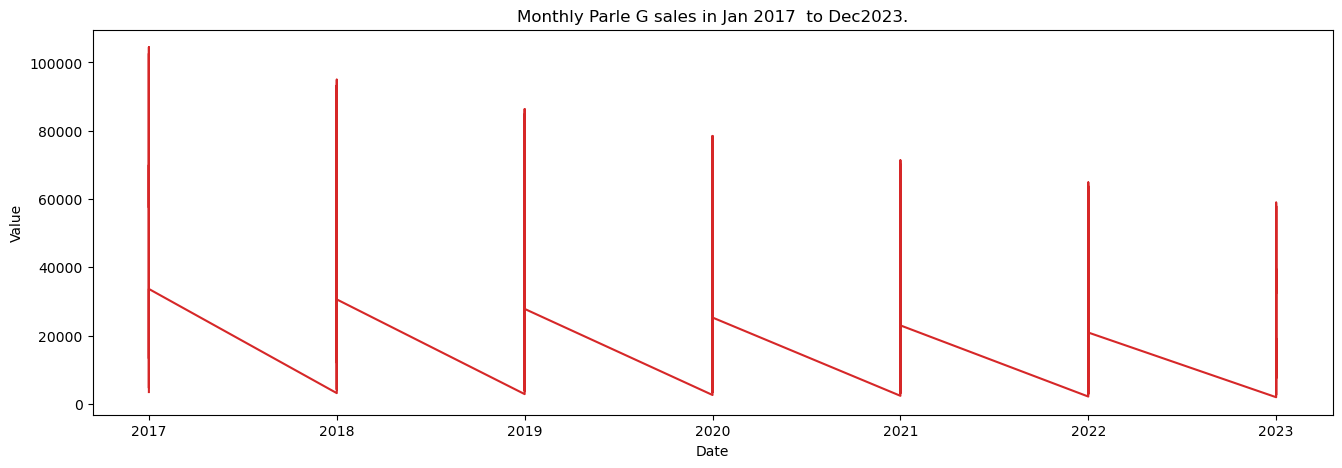

In [7]:
##Draw Plot
import matplotlib.pyplot as plt
import matplotlib as mpl
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(dummy_df, x=dummy_df.index, y=dummy_df.QTY, title='Monthly Parle G sales in Jan 2017  to Dec2023.')    

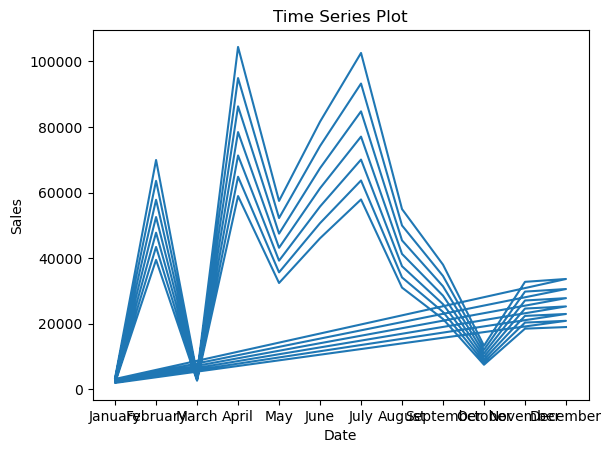

In [12]:
# Check for Trend
plt.plot(dummy_df['Month'], dummy_df['QTY'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Time Series Plot')
plt.show()  # Visual inspection of trend

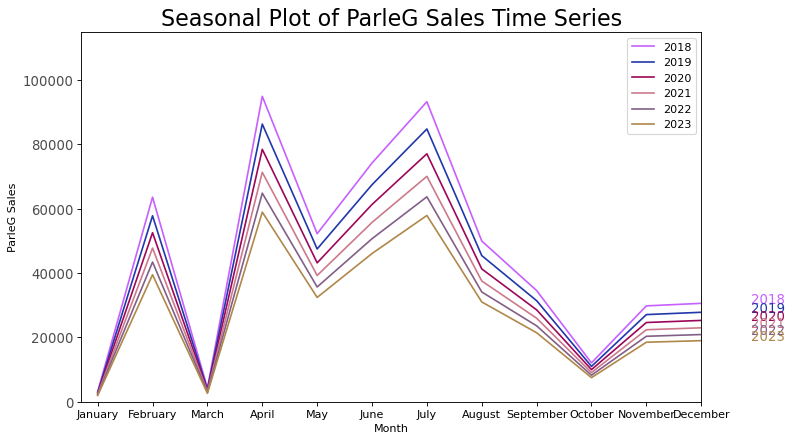

In [14]:
import numpy as np
# Prep Colors
np.random.seed(100)
years = dummy_df['Year'].unique()
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(10, 6), dpi=80)

for i, y in enumerate(years):
    if i > 0:
        data = dummy_df.loc[dummy_df.Year==y, :]
        plt.plot('Month', 'QTY', data=data, color=mycolors[i], label=y)
        plt.text(data.shape[0]-0.1, data['QTY'].iloc[-1], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(0, dummy_df['QTY'].max()*1.1),
              ylabel='ParleG Sales', xlabel='Month')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of ParleG Sales Time Series", fontsize=20)
plt.legend(loc='upper right')
plt.show()


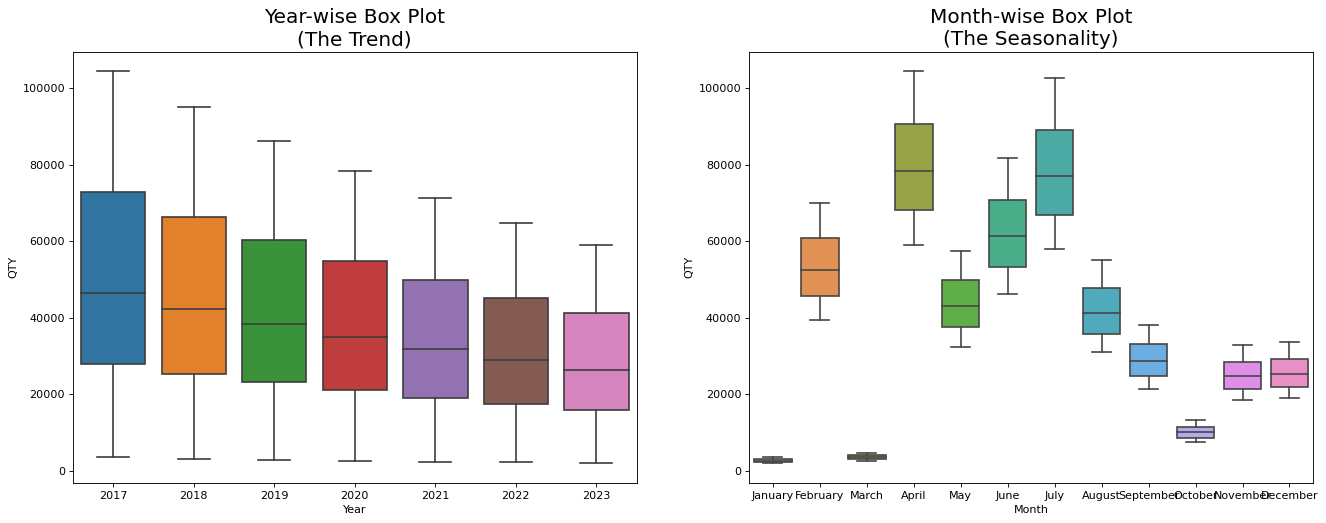

In [15]:
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='Year', y='QTY', data=dummy_df, ax=axes[0])
sns.boxplot(x='Month', y='QTY', data=dummy_df)

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

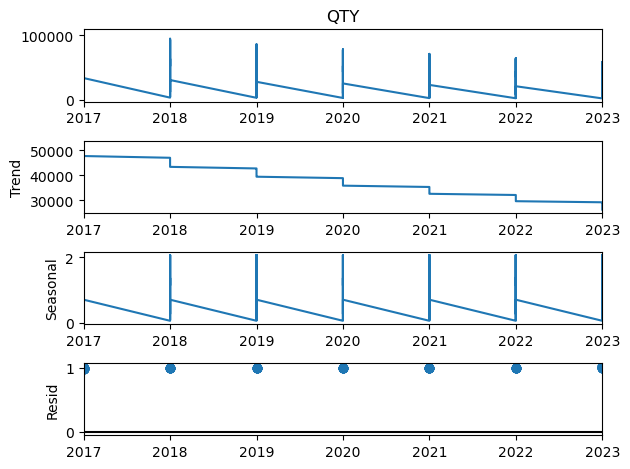

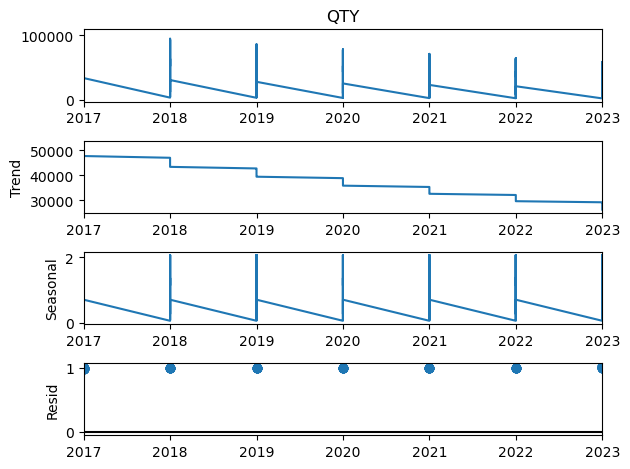

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(dummy_df['QTY'], model='multiplicative',period = 12, extrapolate_trend='freq')
result_mul.plot()

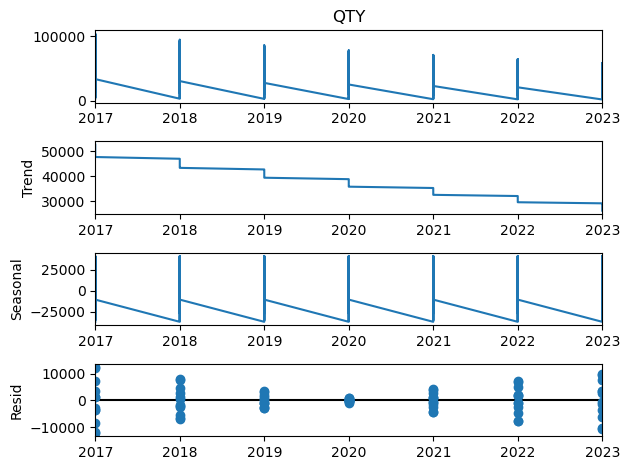

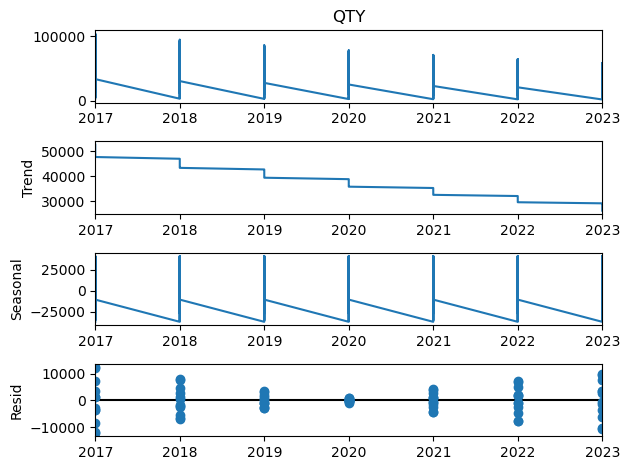

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_add = seasonal_decompose(dummy_df['QTY'], model='additive',period = 12, extrapolate_trend='freq')
result_add.plot()

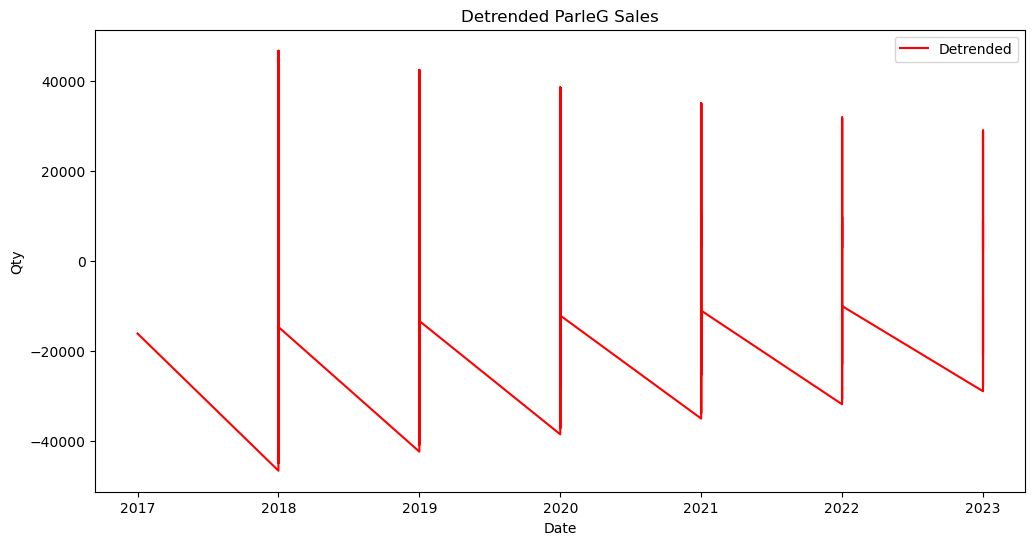

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming monthly_data is already loaded and preprocessed

# Calculate the rolling mean with a suitable window size
window_size = 12  # You can adjust this value based on the seasonality of your data
rolling_mean = dummy_df['QTY'].rolling(window=window_size).mean()

# Subtract the rolling mean from the original data to obtain the detrended series
detrended = dummy_df['QTY'] - rolling_mean

# Plot the original data and the detrended data
plt.figure(figsize=(12, 6))
#plt.plot(monthly_data.index, monthly_data['Qty'], label='Original')
plt.plot(dummy_df.index, detrended, label='Detrended', color='red')
plt.title('Detrended ParleG Sales')
plt.xlabel('Date')
plt.ylabel('Qty')
plt.legend()
plt.show()


In [21]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(detrended.dropna())  # Drop NA values resulting from rolling mean
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -702.4216388050828
p-value: 0.0
Critical Values:
   1%: -3.542412746661615
   5%: -2.910236235808284
   10%: -2.5927445767266866


[]

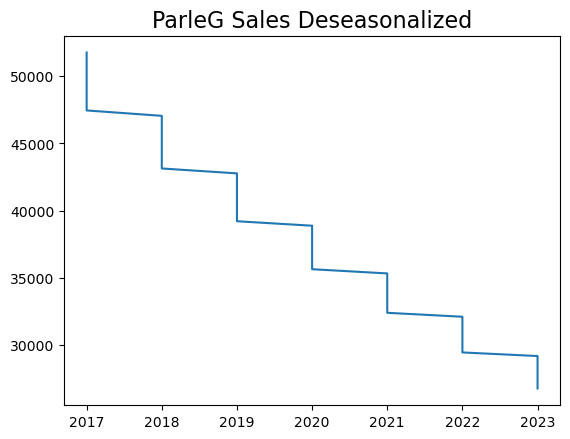

In [22]:
# Time Series Decomposition
result_mul = seasonal_decompose(dummy_df['QTY'], model='multiplicative', extrapolate_trend='freq',period=12)

# Deseasonalize
deseasonalized = dummy_df.QTY.values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('ParleG Sales Deseasonalized', fontsize=16)
plt.plot()

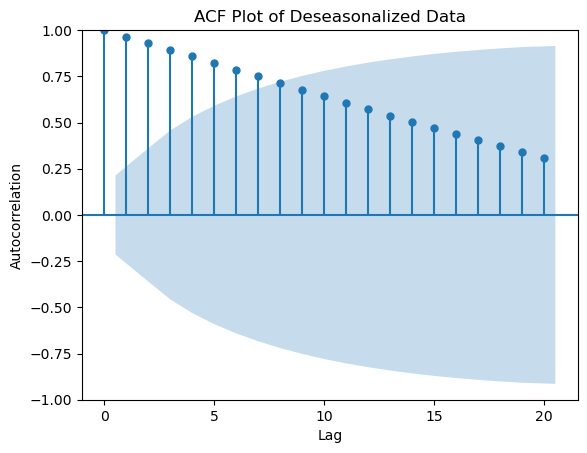

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


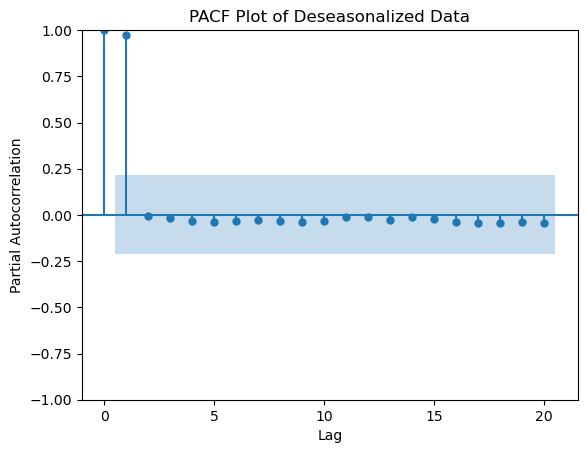

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plot_acf(deseasonalized, lags=20)
plt.title('ACF Plot of Deseasonalized Data')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF
plot_pacf(deseasonalized, lags=20)
plt.title('PACF Plot of Deseasonalized Data')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [24]:
print(len(deseasonalized))

84


84


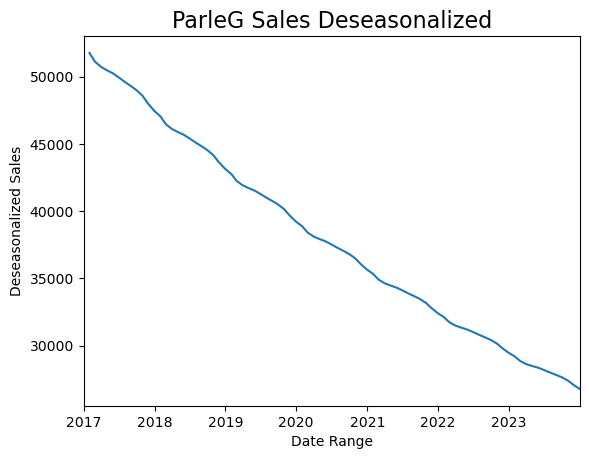

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

print(len(deseasonalized))

# Assuming deseasonalized is your deseasonalized series

# Get the number of months in the data
num_months = len(deseasonalized)

# Generate date ranges based on the number of months
date_ranges = pd.date_range(start='2017-01-01', periods=num_months, freq='M')

# Create a DataFrame with the deseasonalized series and the date ranges
deseasonalized_df = pd.DataFrame({'date_range': date_ranges, 'deseasonalized_sales': deseasonalized})

# Sort the DataFrame by the 'date_range' column
deseasonalized_df.sort_values('date_range', inplace=True)

# Print the first few rows of the sorted DataFrame
#print(deseasonalized_df.head())



# Plot the deseasonalized series
plt.plot(deseasonalized_df['date_range'], deseasonalized_df['deseasonalized_sales'])
plt.title('ParleG Sales Deseasonalized', fontsize=16)
plt.xlim('2017-01-01', '2023-12-31')

plt.xlabel('Date Range')
plt.ylabel('Deseasonalized Sales')
plt.show()


In [26]:
deseasonalized_df.head()

,date_range,deseasonalized_sales
Year,,
2017,2017-01-31,51762.866433
2017,2017-02-28,51120.624344
2017,2017-03-31,50733.699682
2017,2017-04-30,50479.446976
2017,2017-05-31,50252.848485


In [32]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
# You need to specify the order (p, d, q) based on your analysis
p, d, q = 1, 1, 1  # Example values, adjust based on your analysis
model = ARIMA(deseasonalized_df.deseasonalized_sales, order=(p, d, q))

# Fit the ARIMA model
model_fit = model.fit()

# Make forecasts
forecast_steps = 12  # Number of steps to forecast into the future
forecast = model_fit.forecast(steps=forecast_steps)

print(forecast)

# # Plot the forecasts
# plt.plot(deseasonalized, label='Deseasonalized Data')
# plt.plot(range(len(deseasonalized), len(deseasonalized) + forecast_steps), forecast, label='Forecast')
# plt.title('ARIMA Forecasting')
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.legend()
# plt.show()


84    26560.991668
85    26336.806041
86    26113.808472
87    25891.992665
88    25671.352358
89    25451.881320
90    25233.573356
91    25016.422302
92    24800.422026
93    24585.566431
94    24371.849450
95    24159.265048
Name: predicted_mean, dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [31]:
# for a more comprehensive prediction (consider inverse transform if differenced)
print(model_fit.params)

ar.L1         0.994701
ma.L1        -0.925993
sigma2    11998.823746
dtype: float64


In [72]:
test_data = deseasonalized_df[72:]
print(test_data)


     date_range  deseasonalized_sales
Year                                 
2023 2023-01-31          29197.654864
2023 2023-02-28          28855.093407
2023 2023-03-31          28625.974017
2023 2023-04-30          28493.257994
2023 2023-05-31          28364.777923
2023 2023-06-30          28195.516559
2023 2023-07-31          28007.520739
2023 2023-08-31          27832.619694
2023 2023-09-30          27654.442970
2023 2023-10-31          27413.100531
2023 2023-11-30          27080.318445
2023 2023-12-31          26786.371682


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

# Load your time series data into a DataFrame
# For demonstration purposes, let's assume your time series data is in a DataFrame called 'monthly_data'

# Fit SARIMA model
def fit_sarima_model(data, order, seasonal_order):
    model = SARIMAX(data, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit()
    return model_fit

# Define your SARIMA model parameters
order = (1, 0, 1)  # p, d, q
seasonal_order = (1, 1, 1, 12)  # P, D, Q, m (where m is the seasonal period)

# Split data into train and test sets
# train_size = int(len(deseasonalized_df) * 0.8)
train_data = deseasonalized_df[:72]
test_data = deseasonalized_df[72:]

# Fit SARIMA model
model_fit = fit_sarima_model(train_data['deseasonalized_sales'], order, seasonal_order)

# Forecast
forecast = model_fit.forecast(steps=len(test_data))

print(forecast)

# Calculate Mean Squared Error
# mse = mean_squared_error(test_data['deseasonalized_sales'], forecast)
# print('Mean Squared Error:', mse)

# # Plot actual vs. forecasted values
# plt.figure(figsize=(10, 6))
# plt.plot(train_data.index, train_data['deseasonalized_sales'], label='Training Data')
# plt.plot(test_data.index, test_data['deseasonalized_sales'], label='Testing Data')
# plt.plot(test_data.index, forecast, label='Forecasted')
# plt.title('SARIMA Forecast')
# plt.xlabel('Date')
# plt.ylabel('Qty')
# plt.legend()
# plt.show()


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


72    29192.503224
73    28853.347824
74    28627.216842
75    28489.817866
76    28359.340633
77    28188.970991
78    27999.477625
79    27822.803118
80    27641.690914
81    27398.639008
82    27062.438560
83    26764.681147
Name: predicted_mean, dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [37]:
deseasonalized_df['deseasonalized_sales'][67:]

Year
2022    30616.599184
2022    30420.660313
2022    30155.506086
2022    29788.496598
2022    29465.008850
2023    29197.654864
2023    28855.093407
2023    28625.974017
2023    28493.257994
2023    28364.777923
2023    28195.516559
2023    28007.520739
2023    27832.619694
2023    27654.442970
2023    27413.100531
2023    27080.318445
2023    26786.371682
Name: deseasonalized_sales, dtype: float64

84


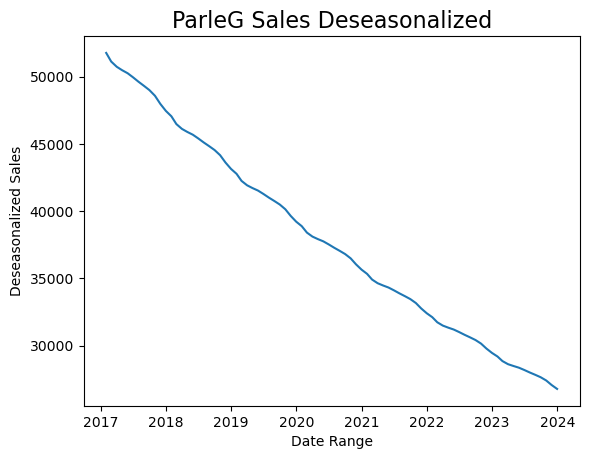

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

print(len(deseasonalized))

# Assuming deseasonalized is your deseasonalized series

# Get the number of months in the data
num_months = len(deseasonalized)

# Generate date ranges based on the number of months
date_ranges = pd.date_range(start='2017-01-01', periods=num_months, freq='M')

# Create a DataFrame with the deseasonalized series and the date ranges
deseasonalized_df = pd.DataFrame({'date_range': date_ranges, 'deseasonalized_sales': deseasonalized})

# Sort the DataFrame by the 'date_range' column
deseasonalized_df.sort_values('date_range', inplace=True)

# Print the first few rows of the sorted DataFrame
#print(deseasonalized_df.head())



# Plot the deseasonalized series
plt.plot(deseasonalized_df['date_range'], deseasonalized_df['deseasonalized_sales'])
plt.title('ParleG Sales Deseasonalized', fontsize=16)

plt.xlabel('Date Range')
plt.ylabel('Deseasonalized Sales')
plt.show()


In [53]:
deseasonalized_df.tail()

,date_range,deseasonalized_sales
Year,,
2023,2023-08-31,27832.619694
2023,2023-09-30,27654.442970
2023,2023-10-31,27413.100531
2023,2023-11-30,27080.318445
2023,2023-12-31,26786.371682


In [44]:
from statsmodels.tsa.arima.model import ARIMA
# Train the ARIMA model
def train_arima_model(data):
    # Define parameters for ARIMA model (p, d, q)
    p, d, q = 1, 0,1
    # Fit ARIMA model to data
    model = ARIMA(data, order=(p, d, q))
    fitted_model = model.fit()
    return fitted_model

In [45]:
def forecast_quantity(start_date, end_date, forecast_horizon):
    # Filter historical sales data for the selected item and date range
    item_sales_data = deseasonalized_df[(deseasonalized_df['date_range'] >= start_date) & 
                            (deseasonalized_df['date_range']  <= end_date)]
    # Train the ARIMA model using filtered sales data
    item_model = train_arima_model(item_sales_data['deseasonalized_sales'])
    # Forecast using the trained model
    forecast = item_model.forecast(steps=forecast_horizon)   
    
    return forecast

In [66]:
def forecast_endpoint():
#     item_id = request.json['item_id']
#     start_date = request.json['start_date']
#     end_date = request.json['end_date']
#     forecast_horizon = request.json['forecast_horizon']
    start_date = '2023-10-01'
    end_date = '2023-11-30'
    forecast_horizon = 2
    
    # Call forecast_quantity function with user inputs
    forecast = forecast_quantity(start_date, end_date, forecast_horizon)
    
    
    # Return forecasted quantity to frontend
    #return jsonify({'forecast': forecast})
    
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    #actual_values = 19000
    #forecast = forecast.flatten()  # Reshape forecast to 1D array if necessary
#     mae = mean_absolute_error(actual_values, forecast)
#     mse = mean_squared_error(actual_values, forecast)
#     rmse = np.sqrt(mse) 

    print(forecast)
#     print("mae-----",mae)
#     print("mse--------",mse)
#     print("rmse--------",rmse)

   


In [67]:
forecast_endpoint()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


2    27413.099402
3    27080.318834
Name: predicted_mean, dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
